In [10]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as pl
import matplotlib as mpl
import pysynphot as S
mpl.rc('font',**{'family':'serif','serif':['Palatino']})
%config InlineBackend.figure_formats = {'png', 'retina'}
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 16

In [11]:
def blackbody(WaveLength, T): 
    #"""Blackbody as a function of wavelength (nm) and temperature (K). 
    #return (photons/s/m^2/str)"""
    from scipy.constants import h,k,c
    wl = WaveLength*1.0e-09 #converting [nm] -> [m]
    photons = 2*c*pow(wl,-4)/(np.exp(h*c/(k*wl*T))-1)
    return photons
class Design_20191111():
    "Optical Design in [mm]"
    def __init__(self,obj):
        self.obj = obj
        "Distances between each boundary"
        self.dist_M_L1        = 2967.071
        self.dist_L1_L2       = 289.248
        self.dist_L2_L3       = 129.766
        self.dist_L3_L4       = 243.54
        self.dist_L4_Window   = 11
        self.dist_Window_CW   = 42.20
        self.dist_CW_F1       = 14.21
        self.dist_F1_F2       = 7.70
        self.dist_F2_Detector = 2.41+1.60+6.88
        "Thickness"
        self.thick_L1         = 44.54
        self.thick_L2         = 17.72
        self.thick_L3         = 19.97
        self.thick_L4         = 18.99
        self.thick_Window     = 9
        self.thick_CW         = 6
        self.thick_F1         = 6
        self.thick_F2         = 6
        "Radius"
        self.radi_Mirror    = 900.098
        self.radi_Hole      = 400  ## temporary value. Hole radius is 
        self.radi_L1S1      = 232.5
        self.radi_L1S2      = 225
        self.radi_L2S1      = 153.73
        self.radi_L2S2      = 136.487
        self.radi_L3S1      = 135.001
        self.radi_L3S2      = 135
        self.radi_L4S1      = 100
        self.radi_L4S2      = 100
        self.radi_WindowS1  = 94.9
        self.radi_WindowS2  = 92.8
        self.radi_CWS1      = 110.2/np.sqrt(2)
        self.radi_CWS2      = 108.4/np.sqrt(2)
        self.radi_F1S1      = 71.6
        self.radi_F1S2      = 70.7
        self.radi_F2S1      = 66.9
        self.radi_F2S2      = 65.5
        self.radi_Detector  = 86.83/np.sqrt(2)
class Config(Design_20191111):
    def __init__(self,obj):
        super().__init__(obj)
        if self.obj == "Mirror":
            self.distance = self.dist_M_L1+self.thick_L1+self.dist_L1_L2+self.thick_L2+self.dist_L2_L3\
                            +self.thick_L3+self.dist_L3_L4+self.thick_L4+self.dist_L4_Window+self.thick_Window\
                            +self.dist_Window_CW+self.thick_CW+self.dist_CW_F1+self.thick_F1+self.dist_F1_F2+self.thick_F2+self.dist_F2_Detector
            self.radius = self.radi_Mirror
            self.angle = np.arctan(self.radius/self.distance)
        if self.obj == "Hole":
            self.distance = self.dist_M_L1+self.thick_L1+self.dist_L1_L2+self.thick_L2+self.dist_L2_L3\
                            +self.thick_L3+self.dist_L3_L4+self.thick_L4+self.dist_L4_Window+self.thick_Window\
                            +self.dist_Window_CW+self.thick_CW+self.dist_CW_F1+self.thick_F1+self.dist_F1_F2+self.thick_F2+self.dist_F2_Detector
            self.radius = self.radi_Hole
            self.angle = np.arctan(self.radius/self.distance)
        if self.obj == "CB":
            self.distance = self.dist_Window_CW+self.thick_CW+self.dist_CW_F1+self.thick_F1+self.dist_F1_F2+self.thick_F2+self.dist_F2_Detector - 4.00
            self.radius   = 131.2/2 #Window has a square shape. Side length...
            self.angle = np.arctan(self.radius/self.distance)
        if self.obj == "CW":
            self.distance = self.dist_CW_F1+self.thick_F1+self.dist_F1_F2+self.thick_F2+self.dist_F2_Detector
            self.radius   = 110.2/2
            self.angle    = np.arctan(self.radius/self.distance)

In [12]:
"Solid Angle"
SA_Hole   = 2*np.pi*(1-np.cos(Config("Hole").angle))
SA_Mirror = 2*np.pi*(1-np.cos(Config("Mirror").angle))-SA_Hole
SA_CB = 4*np.arcsin(np.sin(Config("CB").angle)**2) #Square shape
SA_Barrel = SA_CB - SA_Mirror - SA_Hole
print('Mirror     : ', '{:.4f}'.format(SA_Mirror), ' (str)')
print('Hole       : ', '{:.4f}'.format(SA_Hole), ' (str)\n')
print('-------No considering light bending------------')
print('incident angle: ', '{:.4f}'.format(Config("CB").angle/np.pi*180), '(deg)')
print('Cold Baffle   : ', '{:.4f}'.format(SA_CB), ' (str)')
print('Barrel        : ', '{:.4f}'.format(SA_Barrel), ' (str)')
print('-------Considering light bending------------')
#36.3931 (deg)
#38.0171941703629
SA_CB = 4*np.arcsin(np.sin(38.0171941703629*np.pi/180)**2)
SA_Barrel = SA_CB - SA_Mirror - SA_Hole
print('incident angle: ', '{:.4f}'.format(38.0171941703629),'(deg)')
print('Cold Baffle   : ', '{:.4f}'.format(SA_CB),     ' (str)')
print('Barrel        : ', '{:.4f}'.format(SA_Barrel), ' (str)')

Mirror     :  0.1317  (str)
Hole       :  0.0337  (str)

-------No considering light bending------------
incident angle:  36.3931 (deg)
Cold Baffle   :  1.4390  (str)
Barrel        :  1.2735  (str)
-------Considering light bending------------
incident angle:  38.0172 (deg)
Cold Baffle   :  1.5563  (str)
Barrel        :  1.3908  (str)


In [13]:
# Configuration
WVC_best = True     # 2.3mm or 10.0mm
airmass_best = True # 1.0 or 2.0
Trans_best = True

In [14]:
AR = np.loadtxt("files/AR_coating.dat")
AR14_6 = np.array(AR.T[1]*0.01)**10 # AR coating of L1+L2+L3+L4+Window
AR14_6_m = interp1d(AR.T[0],AR14_6,fill_value=(1,1),bounds_error=False)
QE = np.load("files/VISTA_QE+H4RG_NTE_original.npy") # Quantum Efficiency 
QE_m = interp1d(QE[0],QE[1],fill_value="extrapolate" )
if WVC_best==1 and airmass_best==1:
    sky = np.load("files/cp_skybg_zm_23_10_ph_bin.npy") #(photons/s/arcsec^2/nm/m^2)
if WVC_best==1 and airmass_best==0:
    sky = np.load("files/cp_skybg_zm_23_20_ph_bin.npy") #(photons/s/arcsec^2/nm/m^2)
if WVC_best==0 and airmass_best==1:
    sky = np.load("files/cp_skybg_zm_100_10_ph_bin.npy") #(photons/s/arcsec^2/nm/m^2)
if WVC_best==0 and airmass_best==0:
    sky = np.load("files/cp_skybg_zm_100_20_ph_bin.npy") #(photons/s/arcsec^2/nm/m^2)
sky_m = interp1d(sky[0],sky[1],fill_value="extrapolate")
Ref_Mir = np.loadtxt("files/Reflectance_Mirror.dat") # Reflectance of PRIME mirror
RefMir_m = interp1d(Ref_Mir.T[0]*100,Ref_Mir.T[1]*0.01,fill_value="extrapolate")
Vega = np.loadtxt("files/Vega_stis_008.dat",comments="#") # [erg/s/cm2/A]
NM = Vega.T[0]*0.1 
def erg_cm2_A_to_ph_m2_nm(nm,spectrum):
    h_cons = 6.62607876*1e-27      # [erg s]
    c_cons = 2.99792458*1e+8       # [m/s]
    hc = h_cons*c_cons             # [erg m]
    hv = hc/(nm*1e-9)              # [erg/photons]         
    photons = spectrum*10/hv*1e+4 # [photons/s/m2/nm]
    return photons
photons = erg_cm2_A_to_ph_m2_nm(NM,Vega.T[1])
if Trans_best:
    transky = np.load("files/cp_trans_zm_23_10_ph_bin.npy")
if not Trans_best:
    transky = np.load("files/cp_trans_zm_100_20_ph_bin.npy")
transky_m = interp1d(transky[0],transky[1],fill_value="extrapolate")
Vega_m = interp1d(NM,photons,fill_value="extrapolate") #[photons/s/m^2/nm]
SUN = np.loadtxt("files/Sun_stis_002.dat")
photons_sun = erg_cm2_A_to_ph_m2_nm(SUN.T[0]*0.1,SUN.T[1])
Sun_m = interp1d(0.1*SUN.T[0],photons_sun,fill_value="extrapolate") #[photons/s/m^2/nm]

pixel_pitch = 1.0e-10 # [m^2]
FOV         = 0.25    #[arcsec/pixel]
Mirror_Area = np.pi*(0.9**2-(Config("Hole").radius*0.001)**2) #[m^2]
# Filter Configuration
from scipy import interp, arange, exp
Filters = np.load("files/PRIME_filters_20210803.npy")
CW = np.load("files/PRIME_CWfilter_20210803.npy")
Z_m  = interp1d(Filters[0],Filters[1],fill_value=(1,1),bounds_error=False)
Y_m  = interp1d(Filters[0],Filters[2],fill_value=(1,1),bounds_error=False)
J_m  = interp1d(Filters[0],Filters[3],fill_value=(1,1),bounds_error=False)
H_m  = interp1d(Filters[0],Filters[4],fill_value=(1,1),bounds_error=False)
CW_m = interp1d(CW[0],CW[1],fill_value=(1,1),bounds_error=False)

In [15]:
VEGA = S.Vega
seeing = 1.4 # ["/FWHM]
pix_scale = 0.5**2 #["/pix]
PSF = np.pi*(0.5*seeing)**2/pix_scale #[pix]
dm = 1e-9 # [nm]
Temp = 280

wl = np.arange(500,3001,1)
Sky_cont_H   = sky_m(wl)*QE_m(wl)*AR14_6_m(wl)*FOV*Mirror_Area*H_m(wl)*CW_m(wl)           # [photons/s/pix]
Sky_cont_J   = sky_m(wl)*QE_m(wl)*AR14_6_m(wl)*FOV*Mirror_Area*J_m(wl)*CW_m(wl)           # [photons/s/pix]
Sky_cont_Y   = sky_m(wl)*QE_m(wl)*AR14_6_m(wl)*FOV*Mirror_Area*Y_m(wl)*CW_m(wl)           # [photons/s/pix]
Sky_cont_Z   = sky_m(wl)*QE_m(wl)*AR14_6_m(wl)*FOV*Mirror_Area*Z_m(wl)*CW_m(wl)           # [photons/s/pix]
Therm_cont_H = blackbody(wl,Temp)*dm*(SA_CB)*pixel_pitch*QE_m(wl)*H_m(wl)*CW_m(wl)         # [photons/s/pix]
Therm_cont_J = blackbody(wl,Temp)*dm*(SA_CB)*pixel_pitch*QE_m(wl)*J_m(wl)*CW_m(wl)         # [photons/s/pix]
Therm_cont_Y = blackbody(wl,Temp)*dm*(SA_CB)*pixel_pitch*QE_m(wl)*Y_m(wl)*CW_m(wl)         # [photons/s/pix]
Therm_cont_Z = blackbody(wl,Temp)*dm*(SA_CB)*pixel_pitch*QE_m(wl)*Z_m(wl)*CW_m(wl)         # [photons/s/pix]
Vega0_cont_H = Vega_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*H_m(wl)*CW_m(wl) # [photons/s]
Vega0_cont_J = Vega_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*J_m(wl)*CW_m(wl) # [photons/s]
Vega0_cont_Y = Vega_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*Y_m(wl)*CW_m(wl) # [photons/s]
Vega0_cont_Z = Vega_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*Z_m(wl)*CW_m(wl) # [photons/s]
Sun_cont_H = Sun_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*H_m(wl)*CW_m(wl) # [photons/s]
Sun_cont_J = Sun_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*J_m(wl)*CW_m(wl) # [photons/s]
Sun_cont_Y = Sun_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*Y_m(wl)*CW_m(wl) # [photons/s]
Sun_cont_Z = Sun_m(wl)*transky_m(wl)*RefMir_m(wl)*Mirror_Area*QE_m(wl)*AR14_6_m(wl)*Z_m(wl)*CW_m(wl) # [photons/s]

In [16]:
Mag0  = np.array([np.sum(Vega0_cont_Z),np.sum(Vega0_cont_Y)
                  ,np.sum(Vega0_cont_J),np.sum(Vega0_cont_H)]) #[ph/s]
Noise = np.array([np.sum(Sky_cont_Z+Therm_cont_Z)
                  ,np.sum(Sky_cont_Y+Therm_cont_Y)
                  ,np.sum(Sky_cont_J+Therm_cont_J)
                  ,np.sum(Sky_cont_H+Therm_cont_H)]) #[ph/s]
Sun0  = np.array([np.sum(Sun_cont_Z),np.sum(Sun_cont_Y)
                  ,np.sum(Sun_cont_J),np.sum(Sun_cont_H)]) #[ph/s]

In [17]:
band   = np.array(["Z-band","Y-band","J-band","H-band"])
time = [120,300]
EXPT = np.array([])
mag=np.arange(5,20.001,0.1)

Prec_arr=np.array([])

for elec_vega,elec_noise,pb in zip(Mag0,Noise,band):
    print(pb)
    prec_arr=np.array([])
    for expt in time:
        elec_vega0  = elec_vega*expt
        elec_mag    = 10**(-0.4*mag)*elec_vega0*0.5 # Assuming 50% flux in PSF
        elec_noise0 = elec_noise*expt*PSF
        total = elec_mag + elec_noise0
        prec  = np.sqrt(total)/elec_mag
        prec_arr = np.append(prec_arr,prec)   
    Prec_arr = np.append(Prec_arr,prec_arr)
    #print(prec_arr)
Prec_arr = Prec_arr.reshape(4,len(time),len(mag))

Z-band
Y-band
J-band
H-band


Text(0.5, 1.0, 'Signal Noise Ratio in Seeing Aperture')

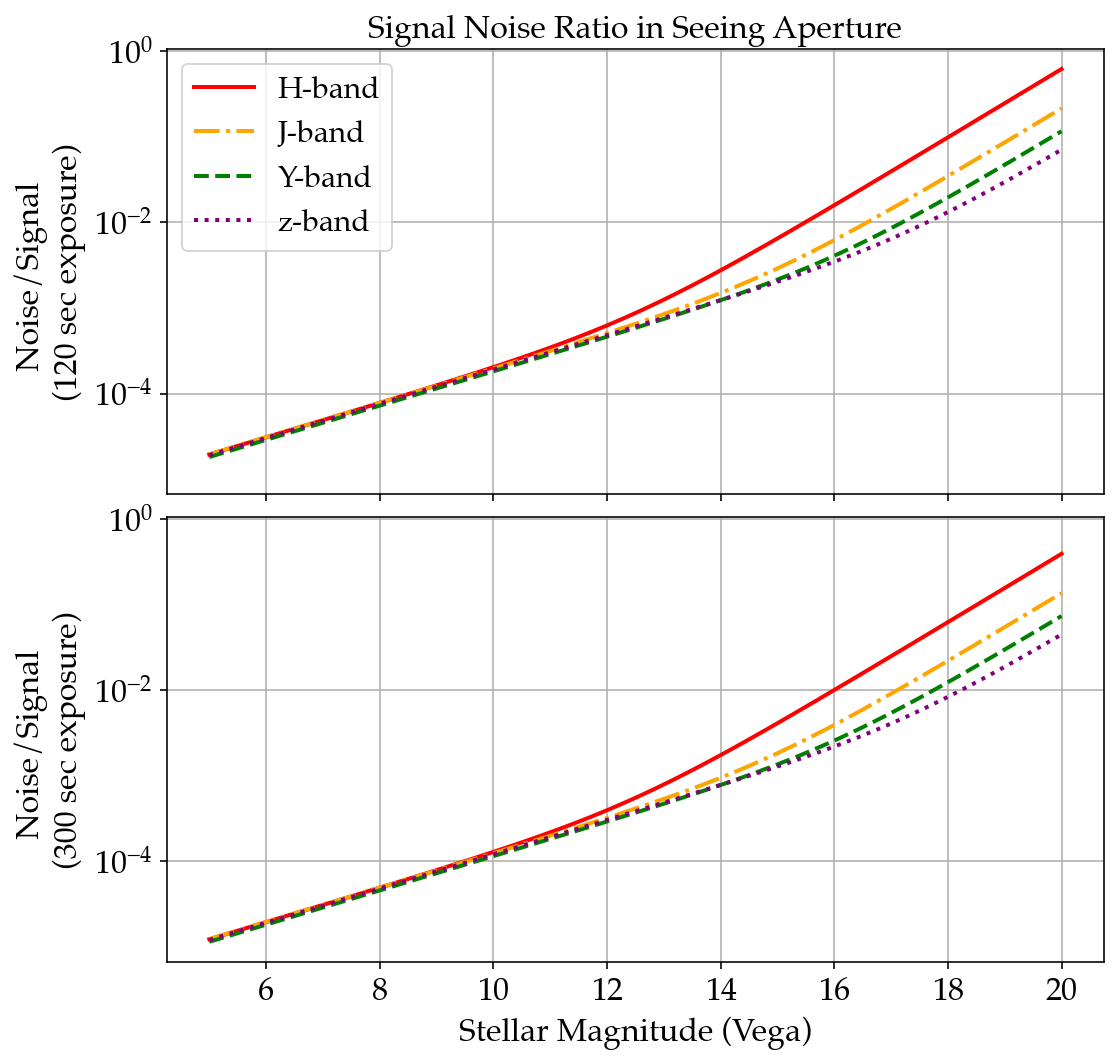

In [18]:
Zband,Yband,Jband,Hband = Prec_arr[0],Prec_arr[1],Prec_arr[2],Prec_arr[3]

fig,ax=pl.subplots(len(time),1,figsize=(12*0.7,12*0.7),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.05)
for i,T in enumerate(time):
    ax[i].plot(mag,Hband[i,:],c="red",label="H-band",lw=2)
    ax[i].plot(mag,Jband[i,:],c="orange",label="J-band",linestyle="-.",lw=2)
    ax[i].plot(mag,Yband[i,:],c="green",label="Y-band",linestyle="--",lw=2)
    ax[i].plot(mag,Zband[i,:],c="purple",label="z-band",linestyle=":",lw=2)
    ax[i].set_yscale("log")
    #ax[i].set_title("Exposure Time:%d sec"%T)
    ax[i].grid()
    #ax[i].set_xlabel("Magnitude")
    ax[i].set_ylabel("Noise/Signal \n("+str(T)+" sec exposure)")
ax[i].set_xlabel("Stellar Magnitude (Vega)")
ax[0].legend(fontsize=15)
ax[0].set_title("Signal Noise Ratio in Seeing Aperture")

In [19]:
H_120s = np.array([mag,Hband[0]])
H_300s = np.array([mag,Hband[1]])
J_120s = np.array([mag,Jband[0]])
J_300s = np.array([mag,Jband[1]])

In [30]:
np.save("maglim_H120s",H_120s)
np.save("maglim_H300s",H_300s)
np.save("maglim_J120s",J_120s)
np.save("maglim_J300s",J_300s)

In [29]:
np.save("../../prime_transit/files/maglim_H120s",H_120s)
np.save("../../prime_transit/files/maglim_H300s",H_300s)
np.save("../../prime_transit/files/maglim_J120s",J_120s)
np.save("../../prime_transit/files/maglim_J300s",J_300s)